<a href="https://colab.research.google.com/github/ALWINAZIH/ALWINAZIH/blob/main/YOLOV5FISHDESEASDETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install
%pip install -q roboflow
import torch
import os
from IPython.display import Image,clear_output #to display image
print(f"setup complete using torch {torch.__version__}({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'cpu'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17494 (from 4)
Receiving objects: 100% (17511/17511), 16.60 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5/yolov5
setup complete using torch 2.6.0+cu124(NVIDIA A100-SXM4-40GB)


In [11]:
from  roboflow import Roboflow
# Replace "YOUR_ROBOFLOW_API_KEY" with your actual Roboflow API key
rf=Roboflow(api_key="YOUR_ROBOFLOW_API_KEY", model_format="yolov5",notebook="ultralytics" )

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [12]:
os.environ["DATASET_DIRECTORY"]="/content/datasets"

In [13]:
rf = Roboflow(api_key="plhcLBf54yAQCtZK15IK")
project = rf.workspace("nazihs-workspace").project("fish-skin-diseases-detection-wyru9")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [14]:
!python train.py --img 416 --epochs 170--data{data.location}/content/data.yaml  --weights yolov5n.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-10 08:30:56.465493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752136256.487718    7287 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752136256.494125    7287 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]

In [15]:
!python train.py --img 416 --epochs 170 --data {dataset.location}/data.yaml  --weights yolov5n.pt --cache

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
    112/169      1.05G    0.03061    0.01805   0.004615         55        416:  73% 30/41 [00:02<00:00, 13.98it/s]/content/yolov5/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    112/169      1.05G    0.03056    0.01803    0.00463         55        416:  73% 30/41 [00:02<00:00, 13.98it/s]/content/yolov5/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    112/169      1.05G    0.03056    0.01795   0.004664         48        416:  78% 32/41 [00:02<00:00, 13.87it/s]/content/yolov5/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.auto

In [16]:
# 1. Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Créer un dossier pour les sauvegardes
!mkdir -p /content/drive/MyDrive/YOLO_Backups

# 3. Copier le fichier du modèle entraîné (.pt) vers Google Drive
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/YOLO_Backups/

# 4. (Optionnel) Copier tout le dossier des résultats de l'entraînement
!cp -r /content/runs/detect/train /content/drive/MyDrive/YOLO_Backups/train_results

Mounted at /content/drive
cp: cannot stat '/content/runs/detect/train/weights/best.pt': No such file or directory
cp: cannot stat '/content/runs/detect/train': No such file or directory


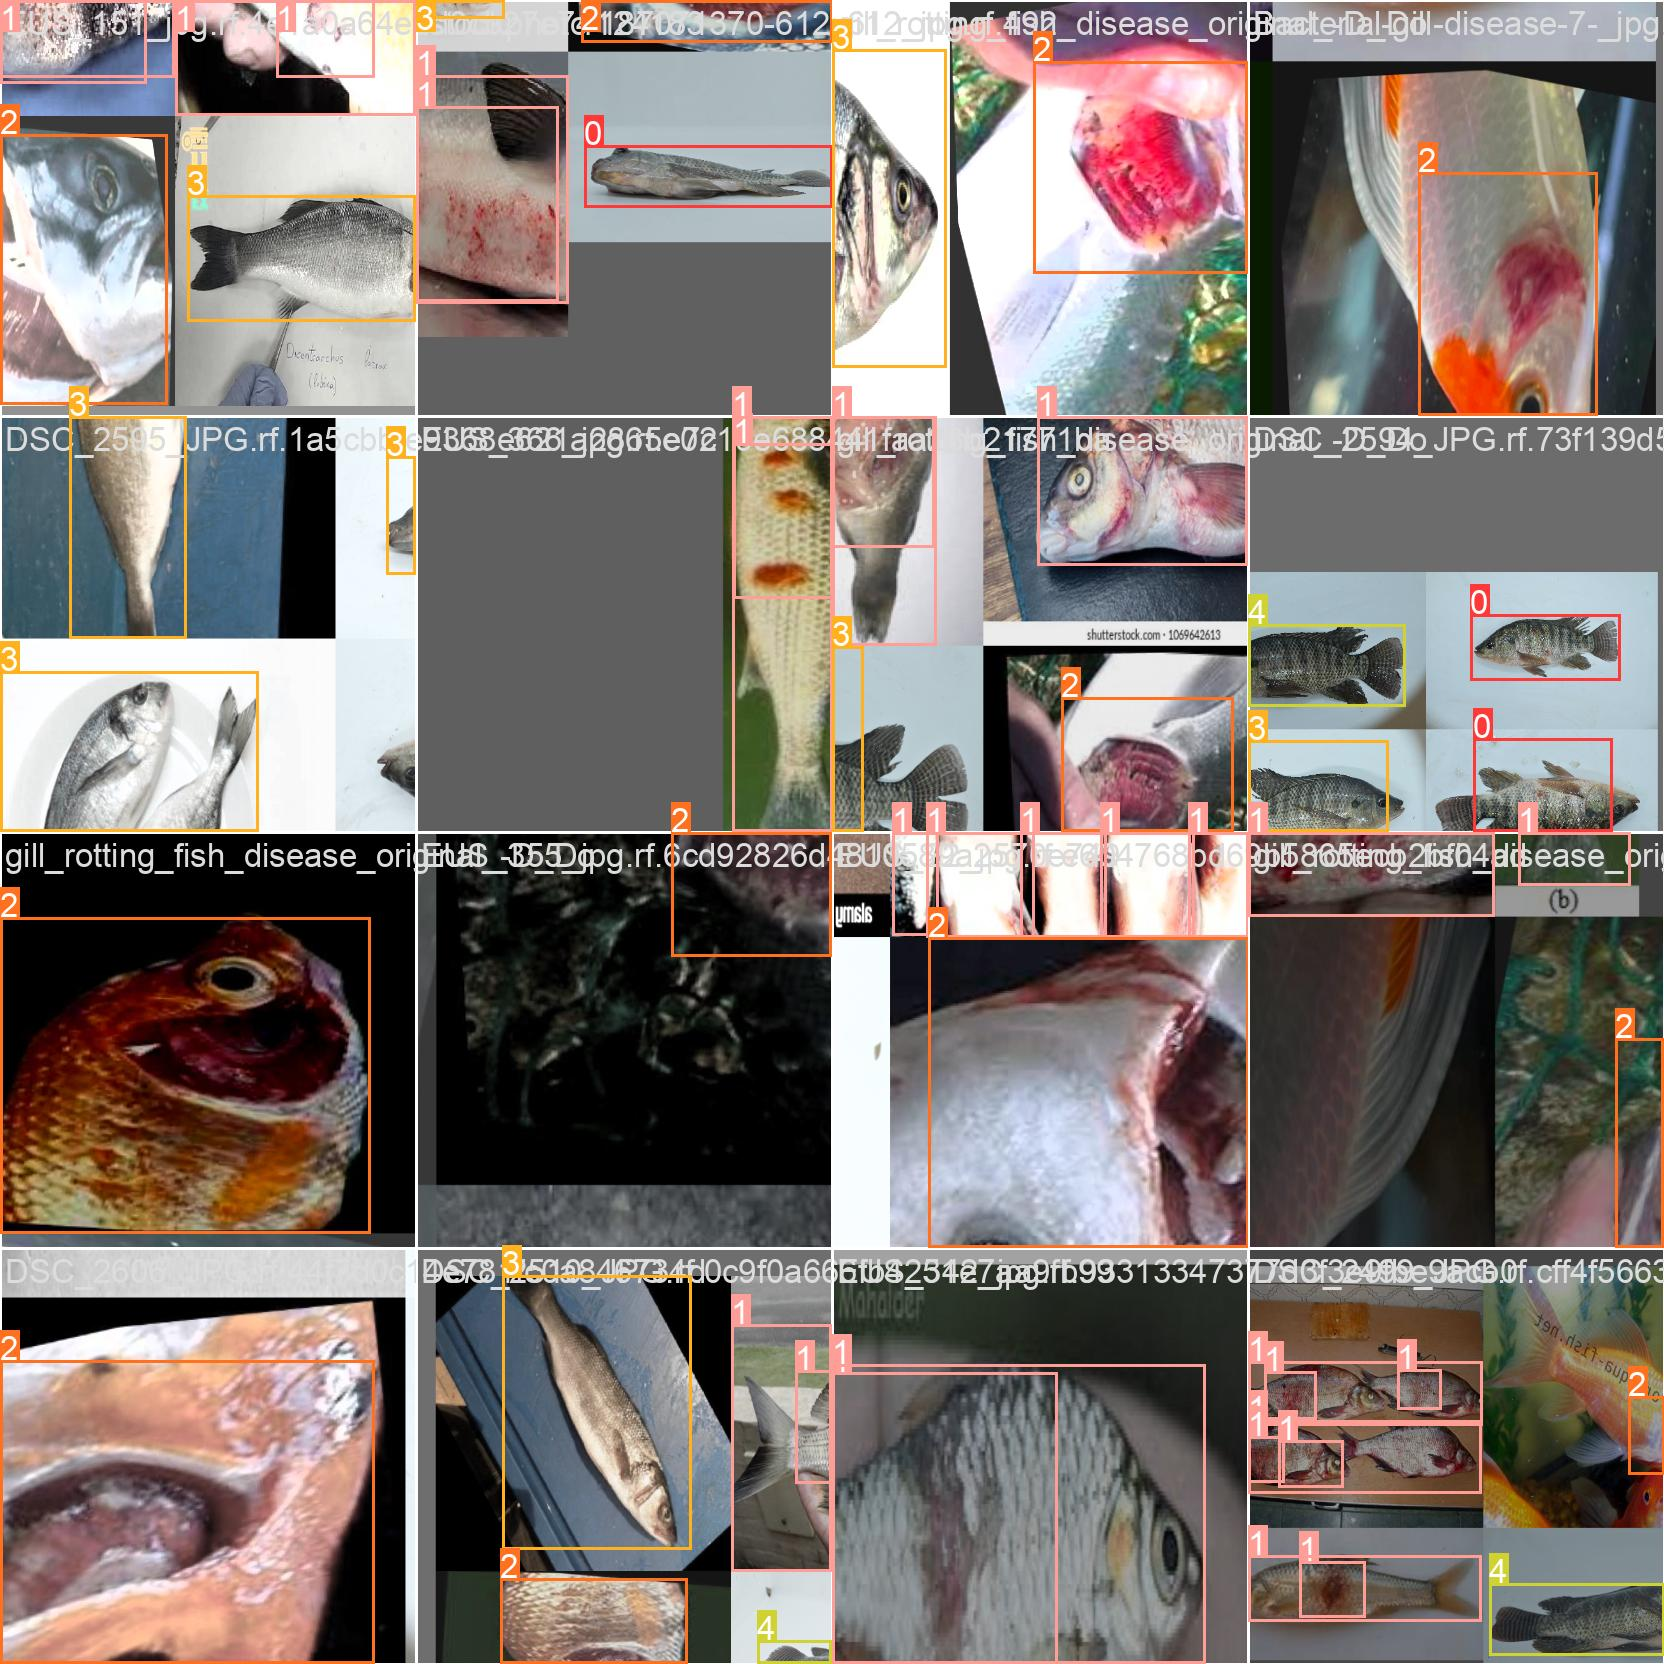

In [18]:
from IPython.display import Image

Image(filename=f'/content/yolov5/runs/train/exp/train_batch1.jpg', width=600)

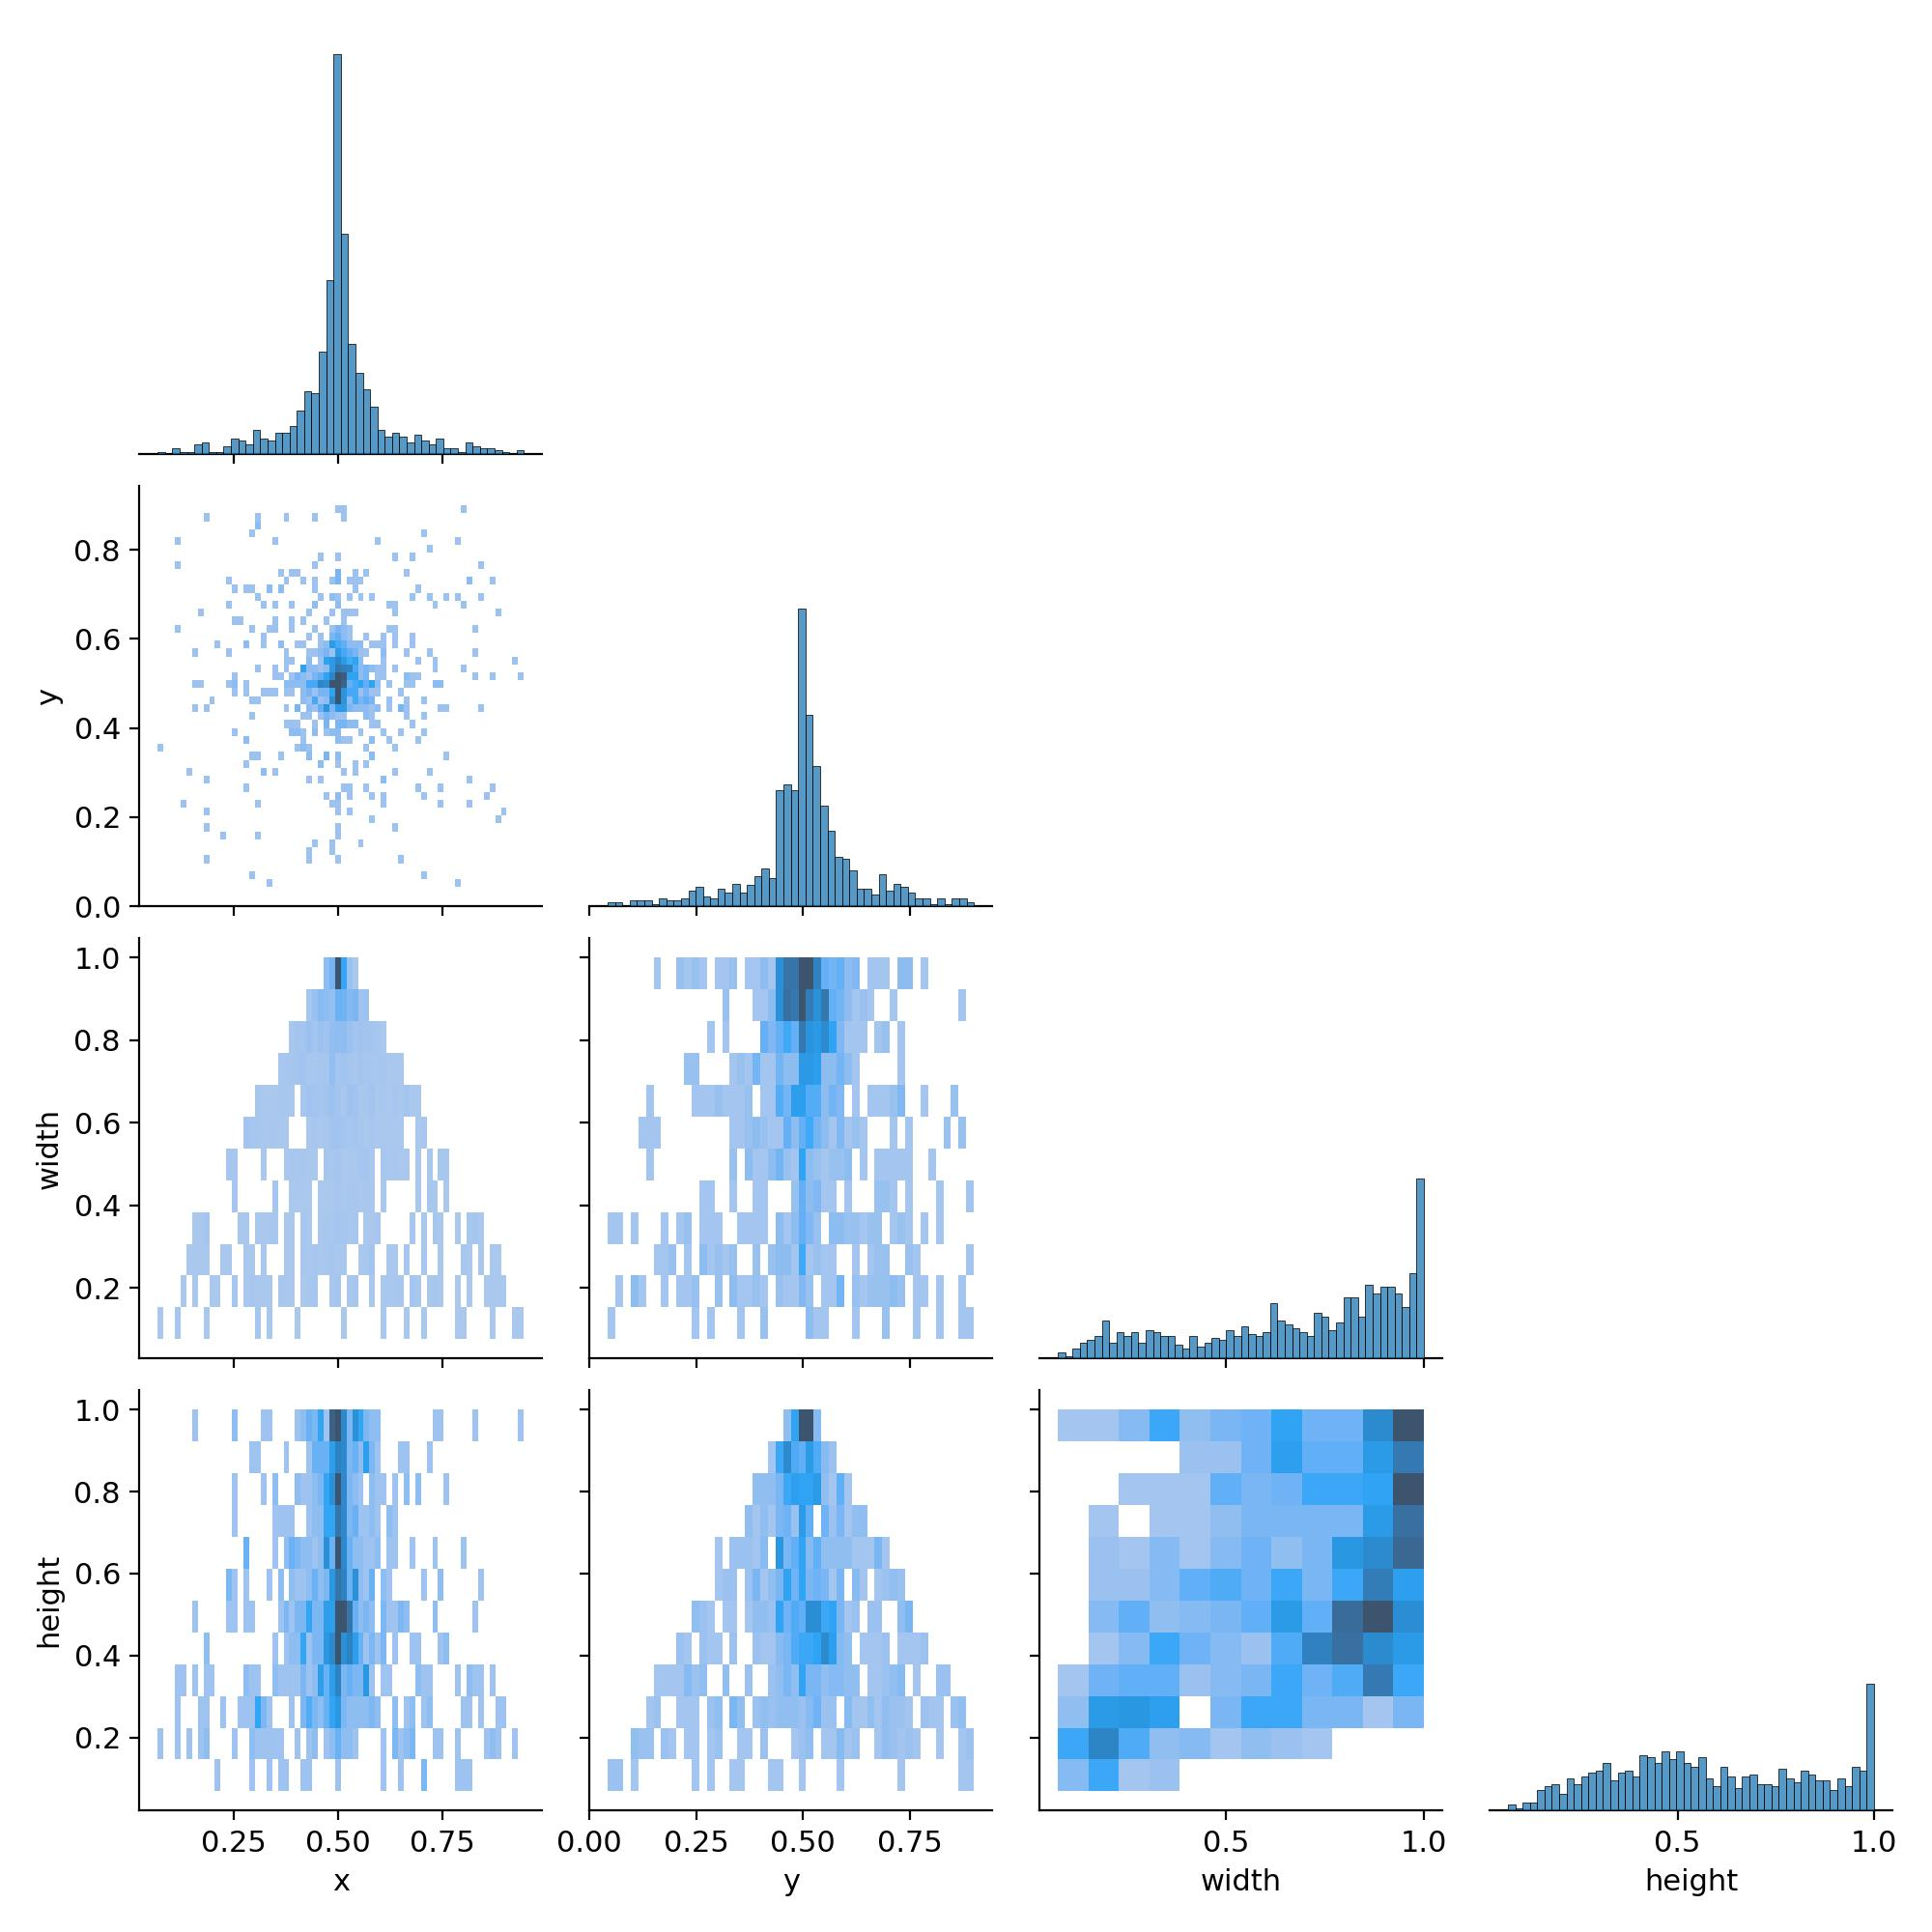

In [19]:
from IPython.display import Image

Image(filename=f'/content/yolov5/runs/train/exp/labels_correlogram.jpg', width=600)